# Modeling Urban Agriculture Benefits


In the following exercise, we will model the benefits of urban agriculture in Bogotá using four main metrics: i) water, ii) land, iii) mile emissions, and iv) plastic savings. We will consider eleven different types of crops, each with a range of values for these metrics. Each individual in our simulation will randomly select their favorite plant from this list, following a uniform distribution.

Simultaneously, each individual will choose a random number of plants to grow. Each type of plant has specific intervals for water usage, land requirements, mile emissions, and plastic savings. A random number will be selected within these intervals to determine the savings achieved by growing a particular plant.

We will model an initial population of 1000 individuals, with a monthly growth rate of 5% over 10 years. The goal is to calculate the benefits of each plant over time as the population grows and engages in urban agriculture.

## Simulation

### Libraries


In [166]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import random

### Data

In [83]:

data = {
    "Tomates": {
        "Agua": (10, 25),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 60,
    },
    "Espinacas": {
        "Agua": (5, 15),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.2, 0.4),
        "Crecimiento": 35,
    },
    "Lechugas": {
        "Agua": (10, 25),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.2, 0.4),
        "Crecimiento": 40,
    },
    "Fresas": {
        "Agua": (10, 20),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 90,
    },
    "Pimientos": {
        "Agua": (10, 20),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 70,
    },
    "Albahaca": {
        "Agua": (5, 15),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.2, 0.4),
        "Crecimiento": 30,
    },
    "Pepinos": {
        "Agua": (10, 25),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 55,
    },
    "Hierbas": {
        "Agua": (5, 15),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.2, 0.4),
        "Crecimiento": 20,
    },
    "Zanahorias": {
        "Agua": (5, 15),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 70,
    },
    "Habas": {
        "Agua": (10, 20),
        "Emisiones": (92, 245),
        "Tierra": (0.2, 0.5),
        "Plástico": (0.1, 0.3),
        "Crecimiento": 80,
    }
}





### Creating Individuals

In [84]:
class Individual :
    def __init__(self):
        self.space = np.random.randint(1, 50)
        self.favorite_plant = self.favorite_plant()
        self.start = True
        self.crop_days = 0

    def favorite_plant(self):
        plants = [
                "Tomates",
                "Espinacas",
                "Lechugas",
                "Fresas",
                "Pimientos",
                "Albahaca",
                "Pepinos",
                "Hierbas",
                "Zanahorias",
                "Fresas",
                "Habas",
            ]
        random_plant = random.choice(plants)
        return random_plant


### Population Dynamics

In [165]:
def seed(size):
    society = []
    for _ in range(size):
        individual_instance = Individual()
        society.append(individual_instance)

    return society

def population_growth(society, rate):
    population_size = len(society)
    growth = np.ceil(population_size*rate)

    for _ in range(int(growth)):
        individual_instance = Individual()
        society.append(individual_instance)

    return society


### Metrics


In [ ]:

def get_benefits(individual, data):
    favorite_plant = individual.favorite_plant
    info_plant = data[favorite_plant]
    benefits = {}
    categories = ["Agua", "Emisiones", "Tierra", "Plástico"]
    for category in categories:
        interval = info_plant[category]
        random_number = random.uniform(interval[0], interval[1])
        benefits[category] = random_number

    return benefits


def crop_benefits(individual, data):
    benefits = {}
    if individual.start == True and individual.crop_days == 0:
        
        favorite_plant = individual.favorite_plant
        crop_days = data[favorite_plant]["Crecimiento"]

        individual.start = False
        individual.crop_days = crop_days

    if individual.start == False and individual.crop_days >= 1:

        individual.crop_days -= 1

    if individual.start == False and individual.crop_days == 0:

        favorite_plant = individual.favorite_plant
        crop_days = data[favorite_plant]["Crecimiento"]
        benefits = get_benefits(individual, data)
    
    return benefits        


def metrics(society, data): 
    metrics = {
    "Agua": 0,
    "Emisiones": 0,
    "Tierra": 0,
    "Plástico": 0
    }

    plant_dict = {
        "Tomates": 0,
        "Espinacas": 0,
        "Lechugas": 0,
        "Fresas": 0,
        "Pimientos": 0,
        "Albahaca": 0,
        "Pepinos": 0,
        "Hierbas": 0,
        "Zanahorias": 0,
        "Fresas": 0,
        "Habas": 0
        }
    
    for individual in society:
        individual_benefits = crop_benefits(individual, data)
        if not individual_benefits:
            pass
        else: 
            metrics["Agua"] += individual_benefits["Agua"]
            metrics["Emisiones"] += individual_benefits["Emisiones"]
            metrics["Tierra"] += individual_benefits["Tierra"]
            metrics["Plástico"] += individual_benefits["Plástico"]
        plant_dict[individual.favorite_plant] += 1
        
    metrics.update(plant_dict)
    metrics['pop'] = len(society)
    
    return metrics

In [136]:
def simulation(seed_size, rate, data, days):
    seed_pop = seed(seed_size)
    simulation= []

    for day in range(0,days):
        if day %30 == 0:
            society = population_growth(seed_pop, rate)
        results = metrics(society, data)
        simulation.append(results)

    return simulation

simulation = simulation(1000, 0.05, data, 3650)
df = pd.DataFrame(result)
df.to_csv("output.csv", index=False)


## Plots

### Water Plot

/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

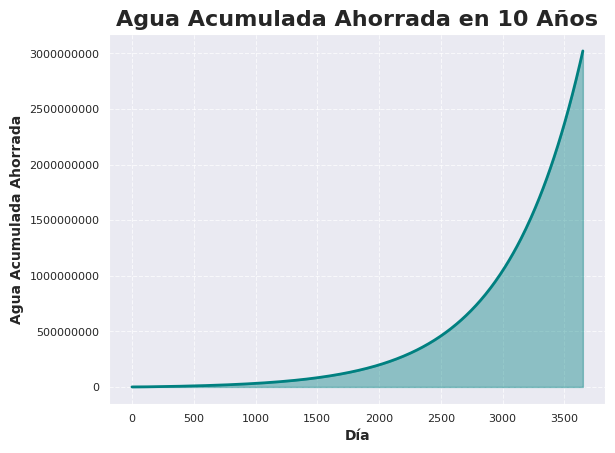

In [169]:
df['Agua Acumulada Ahorrada'] = df['Agua'].cumsum()

# Crear un gráfico de línea Seaborn
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x=df.index, y='Agua Acumulada Ahorrada', color='teal', linewidth=2)
plt.fill_between(df.index, df['Agua Acumulada Ahorrada'], color='teal', alpha=0.4)  # Area plot

# Add a bold title
plt.title('Agua Acumulada Ahorrada en 10 Años', fontsize=16, fontweight='bold')

# Customize axis labels
plt.xlabel('Día', fontsize=10, fontweight='bold')
plt.ylabel('Agua Acumulada Ahorrada', fontsize=10, fontweight='bold')

# Customize tick labels for the y-axis to avoid scientific notation
formatter = FuncFormatter(lambda y, _: f'{y:.0f}')  # Format as integer without decimal places
ax.yaxis.set_major_formatter(formatter)

# Customize tick labels for the x-axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('img/water.png')

# Show the plot
plt.show()



### Emissions Plot

/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

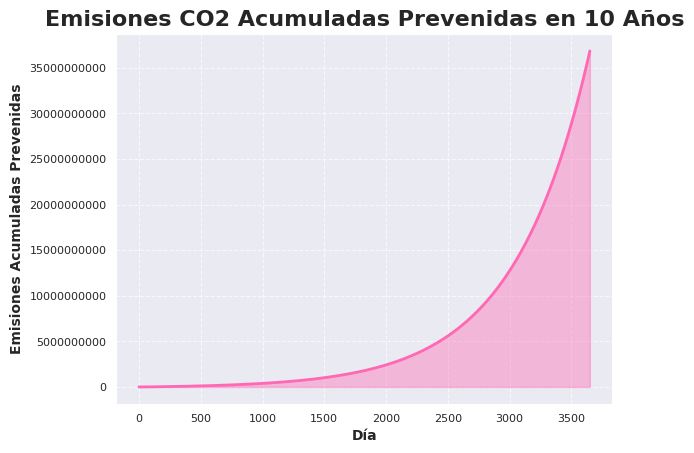

In [170]:
df['Emisiones Acumulada Ahorrada'] = df['Emisiones'].cumsum()

# Crear un gráfico de línea Seaborn
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x=df.index, y='Emisiones Acumulada Ahorrada', color='hotpink', linewidth=2)
plt.fill_between(df.index, df['Emisiones Acumulada Ahorrada'], color='hotpink', alpha=0.4)  # Area plot

# Add a bold title
plt.title('Emisiones CO2 Acumuladas Prevenidas en 10 Años', fontsize=16, fontweight='bold')

# Customize axis labels
plt.xlabel('Día', fontsize=10, fontweight='bold')
plt.ylabel('Emisiones Acumuladas Prevenidas', fontsize=10, fontweight='bold')

# Customize tick labels for the y-axis to avoid scientific notation
formatter = FuncFormatter(lambda y, _: f'{y:.0f}')  # Format as integer without decimal places
ax.yaxis.set_major_formatter(formatter)

# Customize tick labels for the x-axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('img/co2.png')

# Show the plot
plt.show()




### Land Plot

/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

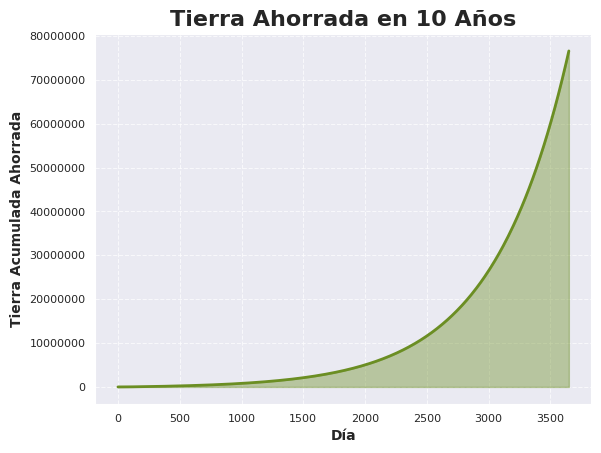

In [171]:
df['Tierra Acumulada Ahorrada'] = df['Tierra'].cumsum()

# Crear un gráfico de línea Seaborn
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x=df.index, y='Tierra Acumulada Ahorrada', color='olivedrab', linewidth=2)
plt.fill_between(df.index, df['Tierra Acumulada Ahorrada'], color='olivedrab', alpha=0.4)  # Area plot

# Add a bold title
plt.title('Tierra Ahorrada en 10 Años', fontsize=16, fontweight='bold')

# Customize axis labels
plt.xlabel('Día', fontsize=10, fontweight='bold')
plt.ylabel('Tierra Acumulada Ahorrada', fontsize=10, fontweight='bold')

# Customize tick labels for the y-axis to avoid scientific notation
formatter = FuncFormatter(lambda y, _: f'{y:.0f}')  # Format as integer without decimal places
ax.yaxis.set_major_formatter(formatter)

# Customize tick labels for the x-axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('img/land.png')

# Show the plot
plt.show()

### Plastic Plot

/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

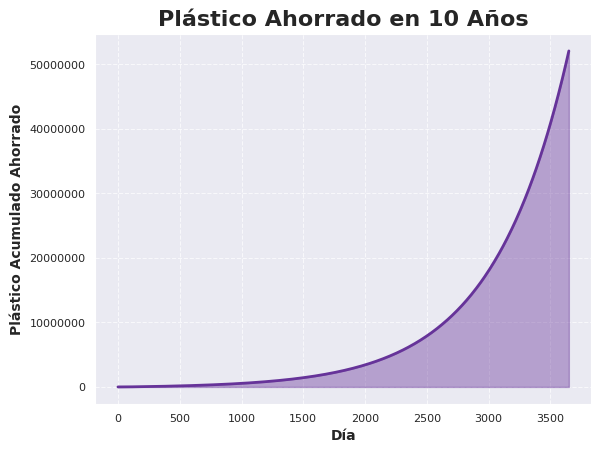

In [172]:
df['Plástico Acumulado Ahorrado'] = df['Plástico'].cumsum()

# Crear un gráfico de línea Seaborn
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x=df.index, y='Plástico Acumulado Ahorrado', color='rebeccapurple', linewidth=2)
plt.fill_between(df.index, df['Plástico Acumulado Ahorrado'], color='rebeccapurple', alpha=0.4)  # Area plot

# Add a bold title
plt.title('Plástico Ahorrado en 10 Años', fontsize=16, fontweight='bold')

# Customize axis labels
plt.xlabel('Día', fontsize=10, fontweight='bold')
plt.ylabel('Plástico Acumulado Ahorrado', fontsize=10, fontweight='bold')

# Customize tick labels for the y-axis to avoid scientific notation
formatter = FuncFormatter(lambda y, _: f'{y:.0f}')  # Format as integer without decimal places
ax.yaxis.set_major_formatter(formatter)

# Customize tick labels for the x-axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('img/plastic.png')

# Show the plot
plt.show()

### Plants Plot

/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tavera/projects/FlowerGirlSimulation/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

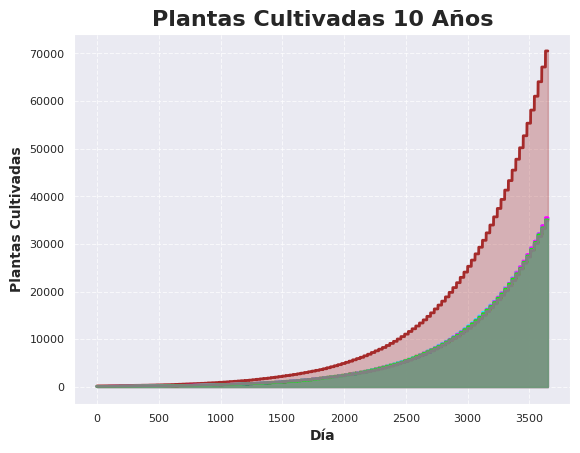

In [179]:



# Define a dictionary with plant-color mappings
plant_colors = {
    "Tomates": "red",
    "Espinacas": "green",
    "Lechugas": "blue",
    "Fresas": "purple",
    "Pimientos": "orange",
    "Albahaca": "pink",
    "Pepinos": "cyan",
    "Hierbas": "magenta",
    "Zanahorias": "lime",
    "Fresas": "brown",
    "Habas": "gray",
}


# Crear un gráfico de línea Seaborn
sns.set_style("darkgrid")


for plant in plant_colors:

    ax = sns.lineplot(data=df, x=df.index, y=plant, color=plant_colors[plant], linewidth=2)
    plt.fill_between(df.index, df[plant], color=plant_colors[plant], alpha=0.3)

# Add a bold title
plt.title('Plantas Cultivadas 10 Años', fontsize=16, fontweight='bold')

# Customize axis labels
plt.xlabel('Día', fontsize=10, fontweight='bold')
plt.ylabel('Plantas Cultivadas', fontsize=10, fontweight='bold')

# Customize tick labels for the y-axis to avoid scientific notation
formatter = FuncFormatter(lambda y, _: f'{y:.0f}')  # Format as integer without decimal places
ax.yaxis.set_major_formatter(formatter)

# Customize tick labels for the x-axis
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('img/plants.png')

# Show the plot
plt.show()